In [1]:
import sys
sys.path.append("../Python")
import ROOT as R
import matplotlib.pyplot as plt
import numpy as np
crystal_width = 6.65*2
beamgapBottom=21.4
beamgapTop=22.3

Welcome to JupyROOT 6.29/01


In [2]:
ix_plus = [2, 9, 8, 2, 8, 7, 8, 10, 7]
fx_plus = [65.06,  169.40,  154.40,   65.06,  154.40,  139.50,  154.40,  184.40,  139.50]
ix_fx = sorted(set(zip(ix_plus, fx_plus)))
#iy_fy = sorted(set(zip(iy, fy)))
print([x[0] for x in ix_fx])
print([x[1] for x in ix_fx])

[2, 7, 8, 9, 10]
[65.06, 139.5, 154.4, 169.4, 184.4]


In [3]:
ix = np.array([-22., -21., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2., 2, 7, 8,  9.,  10.,  11.,
      14.,  15.,  16.,  17.])
fx = np.array([-283.0, -267.3, -99.06, -84.06, -69.08, -54.14, -39.21, -24.31, -9.43, 5.44, 20.3, 65.06, 139.5, 154.4, 169.4, 184.4, 199.5, 244.8, 260.1, 275.3, 290.7])

iy = np.array([-5.0, -4.0, -3.0, -2.0, 1.0, 2.0, 3.0, 4.0])
fy = np.array([-89.14, -74.11, -59.09, -44.08, 29.97, 44.98, 59.99, 75.01])


In [4]:
ix_fx = sorted(set(zip(ix, fx)))
iy_fy = sorted(set(zip(iy, fy)))
print([x[1] for x in iy_fy])

[-89.14, -74.11, -59.09, -44.08, 29.97, 44.98, 59.99, 75.01]


In [5]:
from numpy.polynomial import Polynomial

fit_x1 = Polynomial.fit(fx[ix>0], ix[ix>0], 1, domain=[-300,300], window=[-300,300])
fit_x2 = Polynomial.fit(fx[ix<0], ix[ix<0], 1, domain=[-300,300], window=[-300,300])
fit_y1 = Polynomial.fit(fy[iy>0], iy[iy>0], 1, domain=[-300,300], window=[-300,300])
fit_y2 = Polynomial.fit(fy[iy<0], iy[iy<0], 1, domain=[-300,300], window=[-300,300])


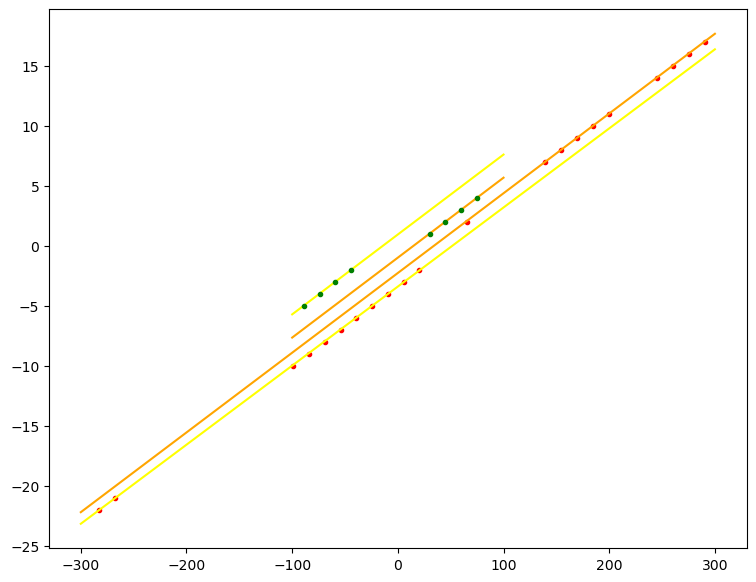

In [6]:
x_dat = np.linspace(-300,300,500)
y_dat = np.linspace(-100,100,500)
fig=plt.figure(figsize=(9,7))
plt.plot(fx, ix, ".", color="red")
plt.plot(x_dat,fit_x1(x_dat), color="orange")
plt.plot(x_dat,fit_x2(x_dat), color="yellow")
plt.plot(y_dat,fit_y1(y_dat), color="orange")
plt.plot(y_dat,fit_y2(y_dat), color="yellow")
plt.plot(fy, iy, ".", color="green")
plt.show()

In [7]:
results = [fit_x1.coef, fit_x2.coef, fit_y1.coef, fit_y2.coef]
print(f"Goodness of fit x>0: {np.sum((fit_x1(fx[ix>0]) - ix[ix>0])**2)/len(ix>0)}")
print(f"Goodness of fit x<0: {np.sum((fit_x2(fx[ix<0]) - ix[ix<0])**2)/len(ix<0)}")
print(f"Goodness of fit y>0: {np.sum((fit_y1(fy[iy>0]) - iy[iy>0])**2)/len(iy>0)}")
print(f"Goodness of fit y<0: {np.sum((fit_y2(fy[iy<0]) - iy[iy<0])**2)/len(iy<0)}")

Goodness of fit x>0: 0.00027913968737732067
Goodness of fit x<0: 0.00099956099646754
Goodness of fit y>0: 1.663781484704805e-08
Goodness of fit y<0: 5.5407698265716954e-08


In [8]:
import sys
sys.path.append("../Python")
import ROOT as R
R.gSystem.Load("/data/HPS/lib/libMiniDST")
R.gSystem.Load("lib/libMC2021")
R.gInterpreter.ProcessLine('''auto EAC = Ecal_Analysis_Class();''')   # This is key. It puts the EAC in C++ space.
print(f"{R.EAC.Version()}")
ch = R.TChain("MiniDST")
ch.Add("/data/HPS/data/physrun2021/sim_2021/new_e-_3.0GeV*.root")
print(f"Number of events loaded: {ch.GetEntries()/1e6:7.3f}M")
mdst = R.MiniDst()          # Initiate the class
mdst.use_mc_particles=True  # Tell it to look for the MC Particles in the TTree
mdst.use_ecal_cluster_uncor = True;
mdst.use_mc_scoring =True;
mdst.DefineBranchMap()      # Define the map of all the branches to the contents of the TTree
mdst.SetBranchAddressesOnTree(ch) # Connect the TChain (which contains the TTree) to the class.
print(f"MminiDST version = {mdst._version_()}")
event = 1

V1.0.3
Number of events loaded:   0.032M
MminiDST version = 1.0.9


In [9]:
hit_map_x = {}
hit_map_y = {}
hit_mapr_x = {}
hit_mapr_y = {}

for event in range(ch.GetEntries()):
   ch.GetEvent(event)
   mdst.ecal_hit_x
   for i in range(len(mdst.ecal_hit_x)):
      hit_map_x[mdst.ecal_hit_index_x[i]] = mdst.ecal_hit_x[i]
      hit_map_y[mdst.ecal_hit_index_y[i]] = mdst.ecal_hit_y[i]
      hit_mapr_x[mdst.ecal_hit_x[i]] = mdst.ecal_hit_index_x[i]
      hit_mapr_y[mdst.ecal_hit_y[i]] = mdst.ecal_hit_index_y[i]

In [10]:
len(hit_map_x.keys()),len(hit_mapr_x.keys()),len(hit_map_y.keys()),len(hit_mapr_y.keys())

(46, 46, 10, 10)

In [11]:
ix = np.array(sorted(hit_map_x.keys()))
fx = np.array([hit_map_x[ii] for ii in sorted(hit_map_x.keys())])
iy = np.array(sorted(hit_map_y.keys()))
fy = np.array([hit_map_y[ii] for ii in sorted(hit_map_y.keys())])

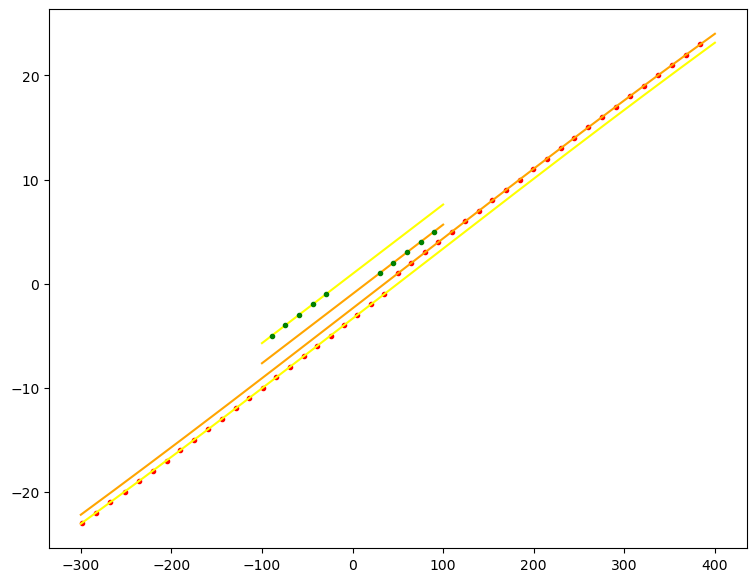

Goodness of fit x>0: 7.582272779542017e-09
Goodness of fit x<0: 7.589515597498859e-09
Goodness of fit y>0: 1.7047502989629487e-07
Goodness of fit y<0: 1.7049150385393432e-07


In [12]:
fit_x1 = Polynomial.fit(fx[ix>0], ix[ix>0], 3, domain=[-300,400], window=[-300,400])
fit_x2 = Polynomial.fit(fx[ix<0], ix[ix<0], 3, domain=[-300,400], window=[-300,400])
fit_y1 = Polynomial.fit(fy[iy>0], iy[iy>0], 1, domain=[-300,400], window=[-300,400])
fit_y2 = Polynomial.fit(fy[iy<0], iy[iy<0], 1, domain=[-300,400], window=[-300,400])
x_dat = np.linspace(-300,400,500)
y_dat = np.linspace(-100,100,500)
fig=plt.figure(figsize=(9,7))
plt.plot(fx, ix, ".", color="red")
plt.plot(x_dat,fit_x1(x_dat), color="orange")
plt.plot(x_dat,fit_x2(x_dat), color="yellow")
plt.plot(y_dat,fit_y1(y_dat), color="orange")
plt.plot(y_dat,fit_y2(y_dat), color="yellow")
plt.plot(fy, iy, ".", color="green")
plt.show()
results = [fit_x1.coef, fit_x2.coef, fit_y1.coef, fit_y2.coef]
print(f"Goodness of fit x>0: {np.sum((fit_x1(fx[ix>0]) - ix[ix>0])**2)/len(ix>0)}")
print(f"Goodness of fit x<0: {np.sum((fit_x2(fx[ix<0]) - ix[ix<0])**2)/len(ix<0)}")
print(f"Goodness of fit y>0: {np.sum((fit_y1(fy[iy>0]) - iy[iy>0])**2)/len(iy>0)}")
print(f"Goodness of fit y<0: {np.sum((fit_y2(fy[iy<0]) - iy[iy<0])**2)/len(iy<0)}")

In [13]:
crystal_offsets = [x[0] for x in results]
crystal_factor = [x[1] for x in results]
crystal_factor2 = [x[2] for x in results[0:2]]
crystal_factor3 = [x[3] for x in results[0:2]]
print(f"crystal_offsets = [{','.join([str(s) for s in crystal_offsets])}]")
print(f"crystal_factors = [{','.join([str(s) for s in crystal_factor])}]")
print(f"crystal_factors2= [{','.join([str(s) for s in crystal_factor2])}]")
print(f"crystal_factors3= [{','.join([str(s) for s in crystal_factor3])}]")

crystal_offsets = [-2.3821570800479677,-3.366185008490163,-0.9954516016045554,0.9355181571469946]
crystal_factors = [0.06734542712420798,0.06725930939554325,0.0665927423975814,0.06659274408814787]
crystal_factors2= [8.885221871301932e-07,1.8973612548288845e-06]
crystal_factors3= [-1.0878872648102657e-08,-1.0878775486630907e-08]


In [14]:
def pos_x_to_index(pos):
   if pos>0:
      return crystal_offsets[0] + pos*crystal_factor[0] + pos*pos*crystal_factor2[0] + pos*pos*pos*crystal_factor3[0]
   else:
      return crystal_offsets[1] + pos*crystal_factor[1]+ pos*pos*crystal_factor2[1] + pos*pos*pos*crystal_factor3[1]

def pos_x_to_index_interp(pos):
   idx = np.searchsorted(fx, pos)
   if pos>(fx[22]+fx[23])/2:
      offset = -22
   else:
      offset = -23

   if idx <= 0:
      idx = 1
   # Interpolate between idx-1 and idx.
   if idx >= len(fx):
      idx = len(fx) -1
   return  idx + offset + (pos-fx[idx])/(fx[idx] - fx[idx-1])

def pos_y_to_index(pos):
   if pos>0:
      return crystal_offsets[2] + pos*crystal_factor[2] # + pos*pos*crystal_factor2[2] + pos*pos*pos*crystal_factor3[2]
   else:
      return crystal_offsets[3] + pos*crystal_factor[3] # + pos*pos*crystal_factor2[3] + pos*pos*pos*crystal_factor3[3]

def index_x_to_pos(idx):
   if idx>=0:
      return (idx - crystal_offsets[0])/crystal_factor[0]
   else:
      return (idx - crystal_offsets[1])/crystal_factor[1]

def index_y_to_pos(idx):
   if idx>=0:
      return (idx - crystal_offsets[2])/crystal_factor[2]
   else:
      return (idx - crystal_offsets[3])/crystal_factor[3]


In [15]:
for i in range(len(ix)):
   # print(f"{i:2d}: [{ix[i]:5.1f},{fx[i]:7.1f}] {abs(pos_x_to_index_interp(fx[i]+15)-ix[i]):8.6f} {abs(index_x_to_pos(ix[i])-fx[i]):8.6f} ")
   print(f"{i:2d}: [{ix[i]:5.1f},{fx[i]:7.1f}] {abs(R.EAC.ecal_xpos_to_index(fx[i])-ix[i]):8.6f}  ")

 0: [-22.0, -283.0] 0.002046  
 1: [-21.0, -267.3] 0.001139  
 2: [-10.0,  -99.1] 0.000219  
 3: [ -9.0,  -84.1] 0.000167  
 4: [ -8.0,  -69.1] 0.000207  
 5: [ -7.0,  -54.1] 0.000236  
 6: [ -6.0,  -39.2] 0.000275  
 7: [ -5.0,  -24.3] 0.000167  
 8: [ -4.0,   -9.4] 0.000124  
 9: [ -3.0,    5.4] 0.000157  
10: [ -2.0,   20.3] 0.000162  
11: [  2.0,   65.1] 0.000133  
12: [  7.0,  139.5] 0.000208  
13: [  8.0,  154.4] 0.002911  
14: [  9.0,  169.4] 0.001197  
15: [ 10.0,  184.4] 0.001580  
16: [ 11.0,  199.5] 0.002356  
17: [ 14.0,  244.8] 0.002236  
18: [ 15.0,  260.1] 0.003135  
19: [ 16.0,  275.3] 0.001598  
20: [ 17.0,  290.7] 0.002935  


In [16]:
for i in range(len(iy)):
   # print(f"{i:2d}: [{iy[i]:5.1f}] {abs(pos_y_to_index(fy[i])-iy[i]):8.6f} {abs(index_y_to_pos(iy[i])-fy[i]):8.6f} ")
   print(f"{i:2d}: [{iy[i]:5.1f}] {abs(R.EAC.ecal_ypos_to_index(fy[i])-iy[i]):8.6f}  ")

 0: [ -5.0] 0.000559  
 1: [ -4.0] 0.000330  
 2: [ -3.0] 0.000553  
 3: [ -2.0] 0.000110  
 4: [  1.0] 0.000333  
 5: [  2.0] 0.000110  
 6: [  3.0] 0.000553  
 7: [  4.0] 0.000330  


In [219]:
for x in fx:
   print(f"{x:8.5f}",end=",")
print()

-298.73819,-282.96774,-267.28214,-251.67653,-236.14636,-220.68710,-205.29440,-189.96397,-174.69170,-159.47348,-144.30539,-129.18352,-114.10406,-99.06329,-84.05750,-69.08309,-54.13647,-39.21410,-24.31249,-9.42816, 5.44233,20.30240,35.15547,50.20495,65.05803,79.91810,94.78859,109.67291,124.57452,139.49689,154.44351,169.41792,184.42371,199.46448,214.54393,229.66580,244.83391,260.05212,275.32440,290.65482,306.04755,321.50677,337.03696,352.64255,368.32819,384.09863,


In [15]:
R.EAC.ecal_xpos_to_index(-251)

-19.960824774277683

-13